1. Loading data

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


confirmed_dataframe = pd.read_csv("confirm.csv")
death_dataframe = pd.read_csv("death.csv")
recovered_dataframe = pd.read_csv("recovered.csv")


2.1. Check the structure of the each data set - row, columns and data types

In [19]:
print("Confirmed cases data set structure.")
print(f"Number of rows : {confirmed_dataframe.shape[0]} and columns: {confirmed_dataframe.shape[1]}")
print(f"Data types : {confirmed_dataframe.dtypes}")

Confirmed cases data set structure.
Number of rows : 276 and columns: 499
Data types : Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
TotalConfirmed      int64
Length: 499, dtype: object


2.2. Generate plots of confirmed cases over time for the top countries.

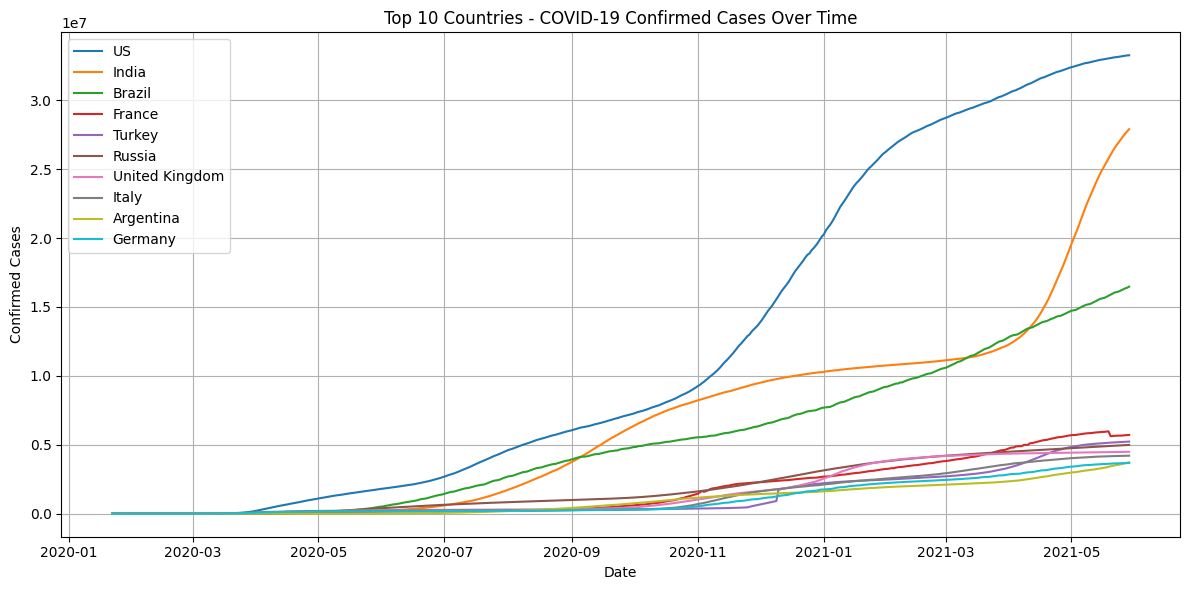

In [ ]:
# Remove Latitude and Longitude Columns
confirmed_dataframe_cleaned = confirmed_dataframe.drop(columns=['Lat', 'Long'], errors='ignore')

# Group by country and sum provinces/states
confirmed_dataframe_grouped = confirmed_dataframe_cleaned.groupby('Country/Region').sum()

# Convert column names to datetime 
date_columns = confirmed_dataframe_grouped.columns
dates = pd.to_datetime(date_columns, format='%m/%d/%y', errors='coerce')
valid_date_mask = ~dates.isna()
dates = dates[valid_date_mask]

# Use only date columns for plotting
confirmed_dataframe_grouped_dates_only = confirmed_dataframe_grouped.loc[:, valid_date_mask]

# Get top 10 countries by latest confirmed cases
top_countries_latest_cases = confirmed_dataframe_grouped_dates_only.iloc[:, -1].sort_values(ascending=False).head(10).index

# Plotting
plt.figure(figsize=(12, 6))
for country in top_countries_latest_cases:
    plt.plot(dates, confirmed_dataframe_grouped_dates_only.loc[country], label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries - COVID-19 Confirmed Cases Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()